# Devnagri Dataset

### Context
This is a dataset of Devanagari Script Characters. It comprises of 92000 images [32x32 px] corresponding to 46 characters, consonants "ka" to "gya", and the digits 0 to 9. The vowels are missing.

### Content
The CSV file is of the dimension 92000 * 1025. There are 1024 input features of pixel values in grayscale (0 to 255). The column "character" represents the Devanagari Character Name corresponding to each image.

[Link To Dataset](https://www.kaggle.com/rishianand/devanagari-character-set)

## 1. Imports

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras.layers as layers
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

## 2. Reading Data

In [2]:
df = pd.read_csv('data.csv')
df.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


## 3. Displaying Data

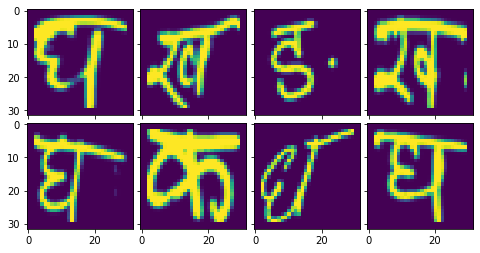

In [3]:
img_cols = df.columns[:1024]

imgs = []
inds = np.random.random_sample((8, ))
inds = map(lambda x: int(x*10000), inds)
for ind in inds:
    x = df.loc[ind, img_cols]
    x = np.array(x, dtype=float)
    x = x.reshape(32,32)
    imgs.append(x)
    
fig = plt.figure(figsize=(8., 16.))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2, 4), 
                 axes_pad=0.1,
                 )
for ax, im in zip(grid, imgs):
    ax.imshow(im)

plt.show()    

## 4. Processing Data

In [4]:
X = df[img_cols]
Y = df['character']
X = X.applymap(lambda x: x/255)

In [5]:
X = X.to_numpy()
Y = Y.to_numpy()
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(Y)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
integer_encoded

array([[ 0],
       [ 0],
       [ 0],
       ...,
       [45],
       [45],
       [45]])

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, integer_encoded, test_size=0.2, random_state=123)

In [7]:
x_train.shape

(73600, 1024)

## 5. Simple Model

In [8]:
input_shape = (1024, )

model = tf.keras.Sequential(
    [
        layers.Flatten(input_shape=input_shape),
        layers.Dense(700, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(300, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(46, activation='softmax')
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 700)               717500    
                                                                 
 dense_1 (Dense)             (None, 500)               350500    
                                                                 
 dense_2 (Dense)             (None, 300)               150300    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_3 (Dense)             (None, 46)                13846     
                                                                 
Total params: 1,232,146
Trainable params: 1,232,146
Non-

In [9]:
num_classes = 46
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

## 6. Training Data

In [10]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
518/518 [==============================] - 8s 9ms/step - loss: 1.0420 - accuracy: 0.7085 - val_loss: 0.4414 - val_accuracy: 0.8692
Epoch 2/15
518/518 [==============================] - 4s 8ms/step - loss: 0.3654 - accuracy: 0.8919 - val_loss: 0.3017 - val_accuracy: 0.9107
Epoch 3/15
518/518 [==============================] - 4s 8ms/step - loss: 0.2251 - accuracy: 0.9314 - val_loss: 0.2466 - val_accuracy: 0.9260
Epoch 4/15
518/518 [==============================] - 4s 8ms/step - loss: 0.1554 - accuracy: 0.9505 - val_loss: 0.2340 - val_accuracy: 0.9341
Epoch 5/15
518/518 [==============================] - 4s 8ms/step - loss: 0.1226 - accuracy: 0.9608 - val_loss: 0.2433 - val_accuracy: 0.9341
Epoch 6/15
518/518 [==============================] - 4s 8ms/step - loss: 0.0993 - accuracy: 0.9681 - val_loss: 0.2336 - val_accuracy: 0.9375
Epoch 7/15
518/518 [==============================] - 4s 8ms/step - loss: 0.0857 - accuracy: 0.9724 - val_loss: 0.2295 - val_accuracy: 0.9409
Epoch 

## 7. Analyzing Training Data

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2623848021030426
Test accuracy: 0.9424999952316284


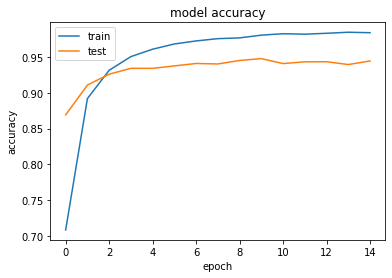

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

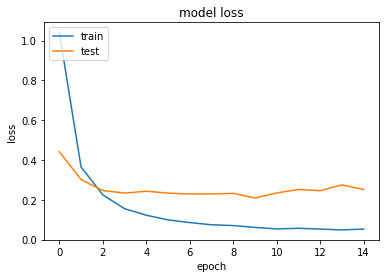

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 8. Saving Model

In [14]:
model.save('dev_simple.h5')